# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20. You don't need to change any code in the following cell, just run it.

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Read the dataset 

In [18]:
# fields are separated by comma and skip the first row (titles) when reading
data = np.loadtxt("hw03_data.txt", skiprows=1, dtype = "float", delimiter=",")

# Scale the data with sklearn StandardScaler
scaler =StandardScaler()
scaler.fit(data)
data = scaler.transform(data)



X = data[:, [0]]
Y = data[:, [1]]


array([[ 1.69630142e+00],
       [ 1.68534269e+00],
       [ 1.66804111e+00],
       [ 1.47795631e+00],
       [ 1.08805316e+00],
       [ 8.73510963e-01],
       [ 8.53248144e-01],
       [ 8.44618933e-01],
       [ 7.62018919e-01],
       [ 7.04823420e-01],
       [ 6.19956404e-01],
       [ 5.76507084e-01],
       [ 5.14131165e-01],
       [ 3.44346978e-01],
       [ 3.04579962e-01],
       [ 2.41930408e-01],
       [ 1.73717157e-01],
       [ 1.35866292e-01],
       [ 1.10124689e-01],
       [ 7.53652335e-02],
       [-2.50106154e-02],
       [-1.92061709e-01],
       [-2.14474425e-01],
       [-2.52224980e-01],
       [-2.56469485e-01],
       [-2.83242879e-01],
       [-3.22219080e-01],
       [-3.39137150e-01],
       [-3.79399416e-01],
       [-4.32534234e-01],
       [-4.57426235e-01],
       [-5.14673522e-01],
       [-5.15973351e-01],
       [-5.31111271e-01],
       [-5.32653709e-01],
       [-5.38095868e-01],
       [-6.72728457e-01],
       [-6.90435475e-01],
       [-8.9

# Visualize the dataset

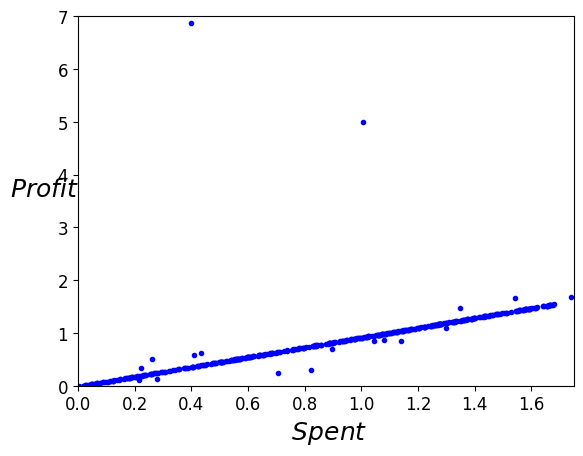

In [14]:
plt.plot(X, Y, "b.")
plt.xlabel(" $Spent$ ", fontsize=18)
plt.ylabel("$Profit$   ", rotation=0, fontsize=18)
plt.axis([0,1.75, 0, 7])
plt.show()

# Training with scikit_learn Linear Regression 



In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [24]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

linear_regression_obj = LinearRegression()
linear_regression_obj.fit(X_train, Y_train)

LinearRegression()

In [25]:
linear_regression_obj.intercept_, linear_regression_obj.coef_

(array([-0.00115483]), array([[0.94421415]]))

# Prediction
Now we can make predictions using the weights.

In [26]:
Y_pred = linear_regression_obj.predict(X_test)
Y_pred

array([[ 0.12876307],
       [-0.18041772],
       [-0.65296841],
       [ 0.19000648],
       [ 1.00174053],
       [-0.65128355],
       [ 0.83644218],
       [ 0.469002  ],
       [-0.74127097],
       [-0.65846955],
       [ 1.15341795],
       [ 1.0427454 ],
       [-0.33329281],
       [-0.26484309],
       [-0.64695977],
       [ 0.95990338],
       [-0.0612397 ],
       [-0.34908577],
       [ 0.02639299],
       [-0.32543693],
       [-1.03139059],
       [ 0.15257431],
       [-1.27526807],
       [-1.16088072],
       [ 1.20735357],
       [ 1.07006845],
       [ 1.39287016],
       [ 0.37917697],
       [ 0.07285841],
       [ 1.02015212],
       [ 0.61542187],
       [-0.14178788],
       [ 1.09942144],
       [ 0.52805307],
       [-1.27471998],
       [-0.71764243],
       [-0.87979436],
       [-1.06447867],
       [-0.06154419],
       [ 1.20510033],
       [-1.38963512],
       [-0.71618087],
       [ 0.05440621],
       [ 0.53448799],
       [ 1.1663081 ],
       [ 0

# Evaluation
Best possible $R^{2}$ score  is 1.0. <br>

In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred) 

0.9134554891584079

In [32]:
X_new = np.array([[0], [2]])
y_predict = linear_regression_obj.predict(X_new)

# Linear regression using gradient descent
Solve the same problem with gradient descent algorithm

In [28]:
alpha = 0.2  # learning rate
n_iterations = 1000
m = 100

weight = np.random.randn(2,1)  # random initialization

X_b = np.c_[np.ones((800, 1)), X_train]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(weight) - y_train)
    weight = weight - alpha * gradients

Print out the weight values

In [29]:
weight

array([[-0.00115483],
       [ 0.94421415]])

In [33]:
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
X_new_b.dot(weight)

array([[-1.15483336e-03],
       [ 1.88727347e+00]])

7. R^2 value is around .91where the data a really good fit to the model.To check if there is any good fit, I have changed the traing and testing data sizes, m value and iteration and data size. I found that when training data size increased to 35%, r^2 values is around 0.95 beyond that it is again decreasing. So, i believe it's the best fit.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)


In [35]:
from statistics import linear_regression
from sklearn.linear_model import LinearRegression

linear_regression_obj = LinearRegression()
linear_regression_obj.fit(X_train, Y_train)


LinearRegression()

In [37]:
linear_regression_obj.intercept_, linear_regression_obj.coef_

(array([0.00376616]), array([[0.94519774]]))

In [41]:
Y_pred = linear_regression_obj.predict(X_test)
Y_pred

array([[ 0.13381939],
       [-0.17568347],
       [-0.64872641],
       [ 0.1951266 ],
       [ 1.00770623],
       [-0.6470398 ],
       [ 0.84223569],
       [ 0.47441275],
       [-0.73712097],
       [-0.65423329],
       [ 1.15954166],
       [ 1.04875382],
       [-0.32871781],
       [-0.26019679],
       [-0.64271152],
       [ 0.9658255 ],
       [-0.0563813 ],
       [-0.34452722],
       [ 0.03134267],
       [-0.32085374],
       [-1.02754279],
       [ 0.15765544],
       [-1.27167433],
       [-1.15716782],
       [ 1.21353346],
       [ 1.07610533],
       [ 1.3992433 ],
       [ 0.38449415],
       [ 0.0778565 ],
       [ 1.02613701],
       [ 0.62098514],
       [-0.13701339],
       [ 1.1054889 ],
       [ 0.53352534],
       [-1.27112567],
       [-0.7134678 ],
       [-0.87578865],
       [-1.06066535],
       [-0.05668611],
       [ 1.21127787],
       [-1.38616051],
       [-0.71200472],
       [ 0.05938508],
       [ 0.53996696],
       [ 1.17244523],
       [ 0

In [42]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9463567704020575